*todo:*
- numpy type refactor
- overwriting variable x of fx with x = roulette
- sympy simplify
- numexpr
- deepcopy
- cut in mse same
- type portability of numpy.types
- jit numba

In [1]:
from random import random, choice, randint , choices
from pprint import pprint
from binarytree import Node , tree
import numpy as np
import graphviz
import sympy
import copy
from typing import Dict, List, Set, Tuple
import numexpr as ne
from matplotlib import pyplot as plt
# import logging
from expression_tree import Expression
from mytools import operator_map, expTree2str, evaluate, evaluate_np
from first_population import generate_expressions

Matplotlib is building the font cache; this may take a moment.


In [41]:
debugflag = False
numexp=5
numops=10
number_max_gen =200
mutation_percent = 0.1
PROP_BINARY = 1.0
BigLog = False


y_plot = []


In [42]:
def f(x):
    return x**2 + 2*x
    # return x**5 + 3*x**4 + 2*x
    # return -9*x**6 + 6*x**5 + 3*x**4 + 2*x
    # return x**5 + 3*x**4 + 2*x + np.sin(x)


In [43]:
op = {'+', '-', '*', '/', '^',
      'sin', 'cos'}
op_info = {'+': (2, 1), '-': (2, 1),
           '*': (2, 2), '/': (2, 2),
           '^': (2, 3),
           'sin': (1, 4), 'cos': (1, 4)}
assotiation = {'+': 'LR', '-': 'LR',
               '*': 'LR', '/': 'LR',
               '^': 'RL',
               'sin': 'RL', 'cos': 'RL'}
varchar = {'x'}
strscope = 'x'
scope = [c for c in strscope] 
# print(f"{scope=}")
# todo : expand scope


In [44]:
def printPopulMse(population,mse=None) -> None:
    if mse is None:
        mse = np.zeros(len(population) , dtype=int)
    print("__________________________________________________________________")
    for tree,num in zip(population,mse):
        print("{0:20d}  |  {1}".format(num,str(sympy.sympify(str(expTree2str(tree)))))  )
    print("__________________________________________________________________")

def printGenStatus(abc:int,mse:np.array, population:Node) -> None:
    print("Gen:{0} --- min:{1}  |  mean:{2}".format(abc,int(np.min(mse)),int(np.mean(mse))))
    y_plot.append(int(np.min(mse)))
    if not BigLog:
        print(str(sympy.sympify(str(expTree2str(population[0])))))


In [45]:
def MSE(actual:np.array, predictions:np.array):
    """Mean Squared Error"""
    # ac, pre        = np.array(actual) ,np.array(predictions)
    ac, pre = actual, predictions
    dif            = np.subtract(ac,pre, dtype='int64')
    squared_error  = np.square(dif,dtype='int64')
    sum_error      = np.sum(squared_error,dtype='int64')
    if debugflag:
        print("''''''''''''''''''''''''''''''''''")
        print(  'ac= '   , ac  ,  '\n',
            'pre= '  , pre ,  '\n',
            'dif= '  , dif ,  '\n',
            'sq= '   ,squared_error,'\n'
            'sum_error= ', sum_error,'\n'
            'len=',len(ac),'\n',
            'final=', sum_error / len(ac)
            )
        print("''''''''''''''''''''''''''''''''''")
    return sum_error / len(ac)
    # sb = [(a1 - b1)**2 for (a1,b1) in zip(actual,predictions)]

In [46]:
def crossover(firstnd: Node, secondnd:Node) -> tuple[Node, Node]:
    # print("______________________________________________________")
    # print(x)
    # print(y)
    # print("++++++++++")
    x_copy = copy.deepcopy(firstnd)
    y_copy = copy.deepcopy(secondnd)
    inorder_x = x_copy.inorder
    inorder_y = y_copy.inorder
    # print(inorder_x, '\n',inorder_y)
    x_node = Node(1)
    y_node = Node(1)
    while x_node.value not in op:
        x_node = choice(inorder_x)
    while y_node.value not in op:
        y_node = choice(inorder_y)
    # print(x_node)
    # print(y_node)
    # print('res')
    x_node.__dict__, y_node.__dict__ = y_node.__dict__, x_node.__dict__
    # print(x_copy)
    # print(y_copy)
    return x_copy, y_copy

In [47]:
def evalFx(population:List[Node] ,x:np.array) -> None:
    y_pred = [evaluate_np(root=tree,vars=x) for tree in population]
    if debugflag:
        print("^^^^^^^^^^^^^^^^^^^^^^f(x)")
        for index,tree in enumerate(population):
            print(f"{index}: {str(sympy.sympify(str(expTree2str(tree))))}")
            print(y_pred[index])
    return y_pred


In [60]:
x = np.arange(-5,5)
y = f(x)
print(f"{x=}")
print(f"{y=}")
# todo range from zero but / has problem
randexpr_arr = generate_expressions(scope, num_exp=numexp, num_ops=numops)
# randexpr_arr = ["sin(x)*x","x*x*x*x","x*x*x*x*x","x*x*x*x*x*x*x*x*x","x*x*x*x*x","x*x*x*x*x*x","x*x + 2*x"]
simpled = [str(sympy.sympify(str(x))) for x in randexpr_arr]
# simpled = list({str(sympy.sympify(str(x))) for x in generate_expressions(scope, num_exp=10, num_ops=10)})
for tree in simpled:
    print(tree)
newvals=[]
for exp in simpled:
    newvals.append(ne.evaluate(exp))
newvals

x=array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])
y=array([15,  8,  3,  0, -1,  0,  3,  8, 15, 24])
num_ops=10
num_exp=5
-x**2 + x
-x
-x**2 + x
-2*x**2
-2*x**2 + x


[array([-30, -20, -12,  -6,  -2,   0,   0,  -2,  -6, -12], dtype=int32),
 array([ 5,  4,  3,  2,  1,  0, -1, -2, -3, -4], dtype=int32),
 array([-30, -20, -12,  -6,  -2,   0,   0,  -2,  -6, -12], dtype=int32),
 array([-50, -32, -18,  -8,  -2,   0,  -2,  -8, -18, -32], dtype=int32),
 array([-55, -36, -21, -10,  -3,   0,  -1,  -6, -15, -28], dtype=int32)]

In [68]:
randexpr_exp = []
randexpr_tree = []
for index, expression in enumerate(randexpr_arr):
    test = Expression(expression=expression, operators=op, operators_info=op_info,
                      operators_associativity=assotiation, variables=varchar)
    randexpr_exp.append(test)
    randexpr_tree.append(test.tree())
    # print(f"{index}:", randexpr_exp[index], "& ", expression)
    print(str(sympy.sympify(str(expTree2str(randexpr_tree[index])))))
    # print(randexpr_tree[index])

    


-8*x**3 + 4*x**2 + 2*x
0
4*x**2 - 2*x
16*x**4
4*x


In [69]:
def get_ready_for_minimizing_selection_np(population, mse):
    mymse = np.max(mse) - mse
    # sumOfList = np.sum(mymse)
    # selection_probs = np.divide(mymse, sumOfList)
    # print('mse=',mse)
    # print("max=",np.max(mse))
    # print("mse_min=", mymse)
    # print('sum=',sumOfList)
    # print('selection=',selection_probs)
    # return selection_probs
    cmsm = np.cumsum(mymse)
    # print(f"{cmsm=}")
    return cmsm

def roulette_wheel_selection_np(population, cmsm):
    # return population[np.random.choice(len(population), p=selection_probs)]
    rnd = int(random()*cmsm[-1])
    argm = np.argwhere(rnd < cmsm)
    # print(f"{rnd=}")
    # print(f"{argm[0]=}")
    return population[argm.tolist()[0][0]]
    


In [51]:
def sortMseAndPopulation(population:list, mse:np.array) -> None:
        sortidx = mse.argsort()
        # print("sortid=" ,sortidx)
        sorted_popul= [population[num] for num in sortidx]
        population = sorted_popul
        mse = np.sort(mse)
        # printPopulMse(sorted_popul,mse)

In [52]:
def mutate(child: Node):
    mutation_operators = ['+', '-', '*']
    inorder_child = child.inorder
    child_node = Node(1)
    while child_node.value not in op:
        child_node = choice(inorder_child)
    child_node.value = mutation_operators[randint(0, len(mutation_operators)-1)]


len(population)=5 || saving*len(population)=1.0
Gen:0 --- min:8  |  mean:501
x**2 + x
len(population)=5 || saving*len(population)=1.0
Gen:1 --- min:8  |  mean:48
x**2 + x
len(population)=5 || saving*len(population)=1.0
Gen:2 --- min:8  |  mean:28
x**2 + x
__________________________________________________________________
                   0  |  x**2 + 2*x
                   8  |  x**2 + x
                   8  |  x**2 + x
                   8  |  x**2 + x
                  34  |  x**2
__________________________________________________________________
Gen:final --- min:0  |  mean:11
x**2 + 2*x


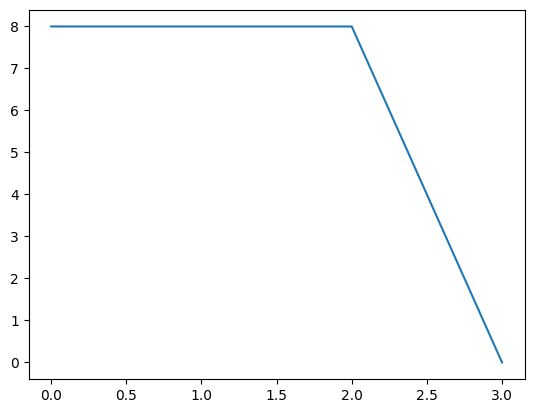


        __+
       /   \
    __+     x
   /   \
  *     x
 / \
x   x

(((x*x)+x)+x)
x**2 + 2*x


In [53]:
def genetic_algo(population: list, mutation_probability: float, saving: float, x: np.array, y: np.array):
    for abc in range(number_max_gen):
        new_population = []
        y_pred = evalFx(population, x)
        mse = np.array([int(MSE(y, gg)) for gg in y_pred])

        sortidx = mse.argsort()
        # print("sortid=" ,sortidx)
        sorted_popul= [population[num] for num in sortidx]
        population = sorted_popul
        mse = np.sort(mse)
        # printPopulMse(sorted_popul,mse)
        if BigLog:
            printPopulMse(population, mse)

        if (mse == 0).any():
            break

        new_population.extend(population[:int(saving * len(population))])
        print(f"{len(population)=} || {saving*len(population)=}")
        if BigLog:
            printPopulMse(new_population)
        printGenStatus(abc, mse, population)

        len_population = int(len(population) * (1-saving) / 2)
        selection_probs = get_ready_for_minimizing_selection_np(
            population, mse)
        for i in range(len_population):
            x_chosen = roulette_wheel_selection_np(population, selection_probs)
            y_chosen = roulette_wheel_selection_np(population, selection_probs)
            (child1, child2) = crossover(x_chosen, y_chosen)
            if random() < mutation_probability:
                if random() < 0.5:
                    mutate(child1)
                else:
                    mutate(child2)

            new_population.append(child1)
            new_population.append(child2)
        population = list(set(new_population))
        # printPopulMse(new_population)

    y_pred = evalFx(population, x)
    mse = np.array([int(MSE(y, gg)) for gg in y_pred])

    sortidx = mse.argsort()
    # print("sortid=" ,sortidx)
    sorted_popul= [population[num] for num in sortidx]
    population = sorted_popul
    mse = np.sort(mse)
    # printPopulMse(sorted_popul,mse)
    printPopulMse(population, mse)
    printGenStatus(abc="final", mse=mse ,population=population)

    return population


res = genetic_algo(population=randexpr_tree, saving=0.2,
                   mutation_probability=mutation_percent, x=x, y=y)

x_plot = list(range(0,len(y_plot)))
# print(x_plot)
# print(y_plot)
plt.plot(x_plot , y_plot)
plt.show()
print(res[0])
print(expTree2str(res[0]))
print(str(
    sympy.sympify(
        str(expTree2str(res[0]))
    )
)
)
# for tree in res:
#     print(tree)
# simpled = [str(sympy.sympify(str(bruh))) for bruh in res]
# pprint(simpled)


In [54]:
# # strscope = "abcde"
# # scope = [c for c in strscope]
# # num_exp=randint(1,5),
# # randexpr = generate_expressions(scope,num_exp=int(input("enter num_exp: ")),num_ops=int(input("enter num_ops: ")))
# # for index,expression in enumerate(randexpr):
# #     print(expression)
# #     # print(f'{index=}------>',tree)
# # test = Expression(expression = "x+sin(90)^2*y",
# #                     operators = {'+', 'sin', '^', '*'},
# #                     operators_info = {'+': (2, 1), '*': (2, 2),'^': (2, 3), 'sin': (1, 4)},
# #                     operators_associativity = {'+': 'LR', '*': 'LR','^': 'RL', 'sin': 'RL'},
# #                     variables = {'x', 'y'})
# expr = "x+sin(90)^2*y"
# expr = '1+2*x^9/cos(x^2)+2*y^9'
# expr = '1+2*x^9/cos(x^2)^2+2*y^9'
# expr = "x+2*y^2"
# op = {'+', '-', '*', '/', '^',
#       'sin', 'cos'}
# op_info = {'+': (2, 1), '-': (2, 1),
#            '*': (2, 2), '/': (2, 2),
#            '^': (2, 3),
#            'sin': (1, 4), 'cos': (1, 4)}
# assotiation = {'+': 'LR', '-': 'LR',
#                '*': 'LR', '/': 'LR',
#                '^': 'RL',
#                'sin': 'RL', 'cos': 'RL'}
# varchar = {'x', 'y'}
# test = Expression(expression=expr, operators=op, operators_info=op_info,
#                   operators_associativity=assotiation, variables=varchar)
# print(expr)
# print(test.tree())
# test.tree().graphviz()
# # pprint(test._tokens)
# # pprint(list(expr))
# print(evaluate(test.tree(), {'x': 4, 'y': 2}))

In [55]:
# test.tree().graphviz()

In [56]:
# test sin /cos
# test = Expression(expression='x^2+2*x +2*x^3* sin(x^2+sin(2*x) )', operators=op, operators_info=op_info,
#                     operators_associativity=assotiation, variables=varchar)
# mysin = expTree2str(test.tree())
# print(mysin)
# str(sympy.sympify(str(mysin)))